# Level 1: Data Cleaning and Preprocessing

## 📌 Description  
Clean and preprocess a raw dataset to make it suitable for analysis.  
This step ensures data quality and consistency before applying analytical or machine learning techniques.

---

## 🎯 Task 2: Data Cleaning and Preprocessing

1. **Handle Missing Data**
   - Apply imputation techniques (mean, median, mode).
   - Remove rows or columns with excessive missing values.
2. **Detect and Remove Outliers**
   - Use statistical methods (e.g., IQR, Z-score) to identify anomalies.
   - Remove or adjust outlier values.
3. **Encode Categorical Variables**
   - **One-Hot Encoding** for nominal categories.
   - **Label Encoding** for ordinal categories.
4. **Normalize or Standardize Numerical Data**
   - Apply **Min-Max Scaling** or **Z-score Standardization** to ensure uniform data ranges.

---

## 🛠 Tools & Technologies
- **Python** – Programming language for data processing.  
- **pandas** – Data manipulation and cleaning.  
- **scikit-learn** – Machine learning preprocessing utilities.  

---

[Project Report](Project%20Report.pdf)

### ✅ import libs 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler 
from sklearn.impute import KNNImputer ,MissingIndicator
from datasist.structdata import detect_outliers
import plotly.express as px

### ✅ Load Data 

In [2]:
df  = pd.read_csv("retail_store_sales.csv")

In [3]:
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


### ✅ Handle Missing Data

In [5]:
df.isnull().sum()/df.shape[0]*100

Transaction ID       0.000000
Customer ID          0.000000
Category             0.000000
Item                 9.646123
Price Per Unit       4.842942
Quantity             4.803181
Total Spent          4.803181
Payment Method       0.000000
Location             0.000000
Transaction Date     0.000000
Discount Applied    33.391650
dtype: float64

In [6]:
# Apply imputing techniques for ["Item", "Discount Applied"]
# For ["Price", "Quantity", "Total Spent"], imputing is not logical → remove rows with missing values
# Show descriptive statistics for "Item"
df[['Item']].describe()

,Item
count,11362
unique,200
top,Item_2_BEV
freq,126


In [7]:
# Since we have many unique categorical values, encoding is required before applying imputing techniques
# Create a dictionary for encoding "Item"
items_key = {}
for idx , item in enumerate(df['Item'].unique()):
    items_key[item] = idx

items = {}
for key in items_key.keys():
    items[items_key[key]] = key


In [8]:
# Apply mapping dictionary for "Item"
df['Item'] = df['Item'].map(items_key)

# Impute null values in ["Item", "Discount Applied"]
imputer = KNNImputer(n_neighbors=8)
df[['Item',"Discount Applied"]] = imputer.fit_transform(df[['Item',"Discount Applied"]])

# Restore original "Item" column after imputing 
df['Item'] = df["Item"].map(items)

# Remove null values from other columns
index = df[df['Quantity'].isnull()].index.tolist() +df[df['Price Per Unit'].isnull()].index.tolist() + df[df['Total Spent'].isnull()].index.tolist()
df.drop(index,inplace=True)
df.reset_index(drop=True,inplace=True)
df

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,1.000
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,1.000
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,0.000
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,0.125
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,0.000
...,...,...,...,...,...,...,...,...,...,...,...
11357,TXN_9347481,CUST_18,Patisserie,Item_23_PAT,38.0,4.0,152.0,Credit Card,In-store,2023-09-03,0.500
11358,TXN_4009414,CUST_03,Beverages,Item_2_BEV,6.5,9.0,58.5,Cash,Online,2022-08-12,0.000
11359,TXN_5306010,CUST_11,Butchers,Item_7_BUT,14.0,10.0,140.0,Cash,Online,2024-08-24,0.375
11360,TXN_5167298,CUST_04,Furniture,Item_7_FUR,14.0,6.0,84.0,Cash,Online,2023-12-30,1.000


In [9]:
df.isnull().sum()/df.shape[0]*100

Transaction ID      0.0
Customer ID         0.0
Category            0.0
Item                0.0
Price Per Unit      0.0
Quantity            0.0
Total Spent         0.0
Payment Method      0.0
Location            0.0
Transaction Date    0.0
Discount Applied    0.0
dtype: float64

### ✅ Detect and Remove Outliers

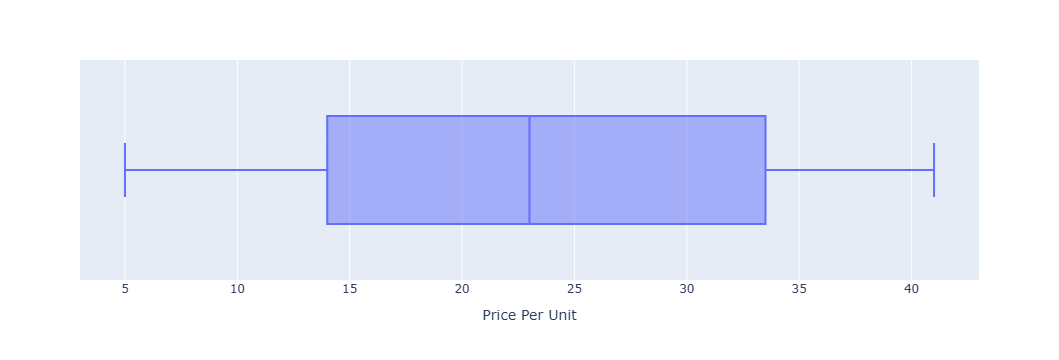

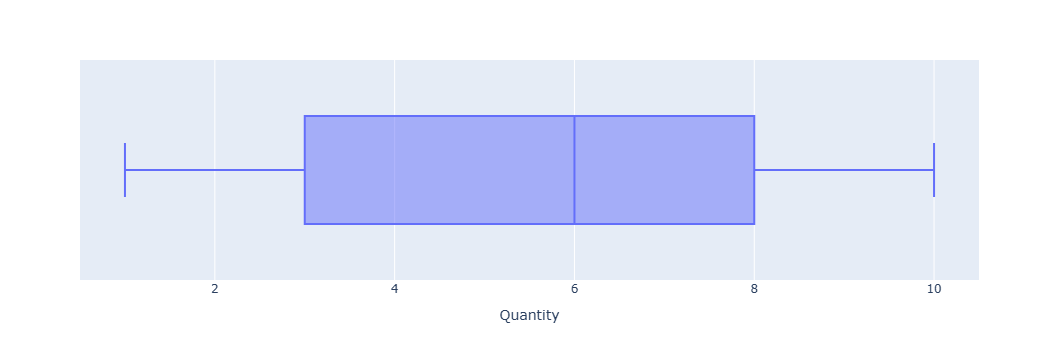

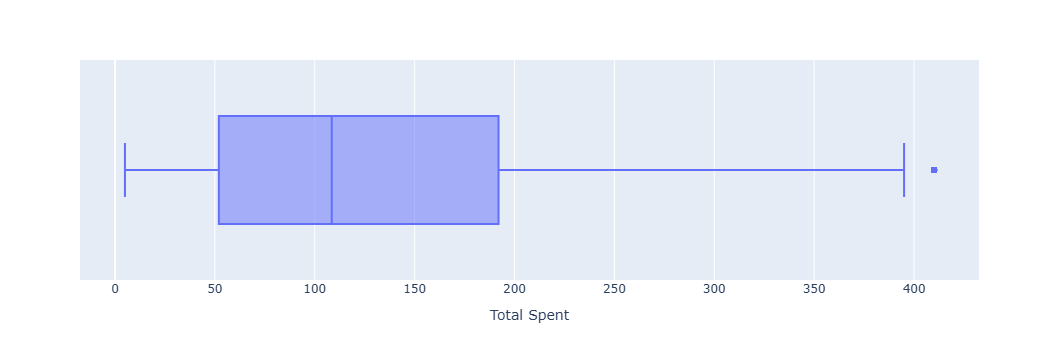

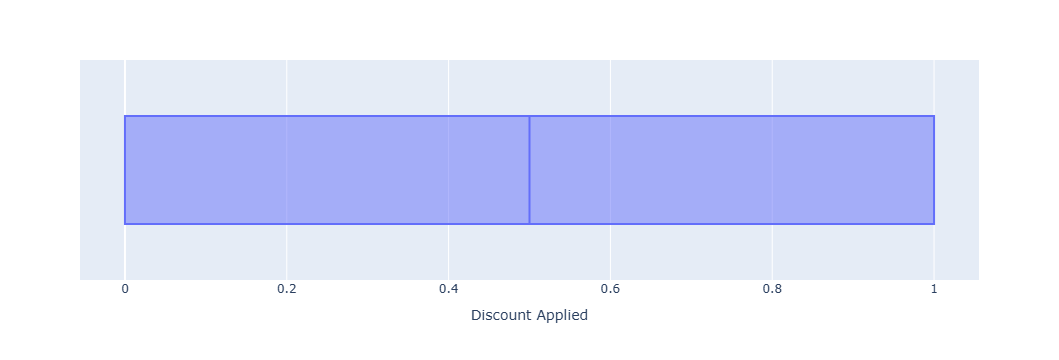

In [10]:
# Use boxplots to visualize columns with potential outliers 
for column in df.select_dtypes(include='number'):
    fig = px.box(df,x=column)
    fig.show()

In [11]:
# Detect outliers in "Total Spent"

out_idx = detect_outliers(df,0,['Total Spent'])
print(f"Count of Outliers {len(out_idx)}")

# Remove outliers 
df.drop(index=out_idx,inplace=True)
df.reset_index(inplace=True,drop=True)
df

Count of Outliers 56


,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,1.000
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,1.000
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,0.000
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,0.125
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,0.000
...,...,...,...,...,...,...,...,...,...,...,...
11301,TXN_9347481,CUST_18,Patisserie,Item_23_PAT,38.0,4.0,152.0,Credit Card,In-store,2023-09-03,0.500
11302,TXN_4009414,CUST_03,Beverages,Item_2_BEV,6.5,9.0,58.5,Cash,Online,2022-08-12,0.000
11303,TXN_5306010,CUST_11,Butchers,Item_7_BUT,14.0,10.0,140.0,Cash,Online,2024-08-24,0.375
11304,TXN_5167298,CUST_04,Furniture,Item_7_FUR,14.0,6.0,84.0,Cash,Online,2023-12-30,1.000


### ✅ Encode Categorical Variables

In [12]:
# Show descriptive statistics for categorical columns
df.select_dtypes(include="object").describe().T

,count,unique,top,freq
Transaction ID,11306,11306,TXN_2407494,1
Customer ID,11306,25,CUST_05,496
Category,11306,8,Furniture,1452
Item,11306,200,Item_2_BEV,126
Payment Method,11306,3,Cash,3902
Location,11306,2,Online,5717
Transaction Date,11306,1114,2022-05-30,25


In [13]:
# From statistical insights:
# - Use Label Encoding (via map) for ["Customer ID", "Category", "Item"]
# - Use OneHot Encoding for ["Payment Method", "Location"]


#let's start with lable Encoder 
le = LabelEncoder()
df['Customer ID_en'],df["Category_en"],df['Item_en'] = le.fit_transform(df['Customer ID']),le.fit_transform(df["Category"]),df['Item'].map(items_key)

#now let's use OneHot
onh = OneHotEncoder(sparse_output=False)
encoded = onh.fit_transform(df[["Payment Method","Location"]])
data = pd.DataFrame(data=encoded,columns=onh.get_feature_names_out(["Payment Method", "Location"]))
df_encoded = pd.concat([df,data],axis=1)
df_encoded.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,Customer ID_en,Category_en,Item_en,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Digital Wallet,Location_In-store,Location_Online
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,1.000,8,7,0,0.0,0.0,1.0,0.0,1.0
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,1.000,21,6,1,0.0,0.0,1.0,0.0,1.0
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,0.000,1,1,2,0.0,1.0,0.0,0.0,1.0
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,0.125,5,0,3,0.0,1.0,0.0,0.0,1.0
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,0.000,4,4,4,0.0,0.0,1.0,0.0,1.0


### ✅ Scaling Data 

In [14]:
# - Display descriptive statistics again to determine the best scaler
df.select_dtypes(include="number").columns

Index(['Price Per Unit', 'Quantity', 'Total Spent', 'Discount Applied',
       'Customer ID_en', 'Category_en', 'Item_en'],
      dtype='object')

In [15]:
df[['Price Per Unit', 'Quantity', 'Total Spent']].describe().T

,count,mean,std,min,25%,50%,75%,max
Price Per Unit,11306.0,23.269459,10.690356,5.0,14.0,23.0,32.0,41.0
Quantity,11306.0,5.512913,2.844839,1.0,3.0,6.0,8.0,10.0
Total Spent,11306.0,128.253892,92.812029,5.0,51.0,108.5,190.0,395.0


In [16]:
# Apply StandardScaler for ["Price per Unit", "Total Spent"]
# "Quantity" ranges from 1 → 10, so scaling is unnecessary
scaler = StandardScaler()
df_encoded[["Price Per Unit_sc","Total Spent_sc"]] = scaler.fit_transform(df_encoded[["Price Per Unit","Total Spent"]])

In [20]:
df_encoded.columns

Index(['Transaction ID', 'Customer ID', 'Category', 'Item', 'Price Per Unit',
       'Quantity', 'Total Spent', 'Payment Method', 'Location',
       'Transaction Date', 'Discount Applied', 'Customer ID_en', 'Category_en',
       'Item_en', 'Payment Method_Cash', 'Payment Method_Credit Card',
       'Payment Method_Digital Wallet', 'Location_In-store', 'Location_Online',
       'Price Per Unit_sc', 'Total Spent_sc'],
      dtype='object')

In [21]:
df.columns 

Index(['Transaction ID', 'Customer ID', 'Category', 'Item', 'Price Per Unit',
       'Quantity', 'Total Spent', 'Payment Method', 'Location',
       'Transaction Date', 'Discount Applied', 'Customer ID_en', 'Category_en',
       'Item_en'],
      dtype='object')

### ✅ Final Dataset

In [22]:
# let's split to EDA version and model version 
eda_df = df_encoded[[
    "Transaction ID",
    "Customer ID",
    "Category",
    "Item",
    "Price Per Unit",
    "Quantity",
    "Total Spent",
    "Payment Method",
    "Location",
    "Transaction Date",
    "Discount Applied"
]]

model_df = df_encoded[[
    "Customer ID_en", 
    "Category_en",
    "Item_en",

    # One-hot encoded categorical
    "Payment Method_Cash",
    "Payment Method_Credit Card",
    "Payment Method_Digital Wallet",
    "Location_In-store",
    "Location_Online",

    # Scaled numeric
    "Price Per Unit_sc",
    "Quantity",          
    "Total Spent_sc",
    "Discount Applied"  
]]

In [23]:
# save it
eda_df.to_csv("retail_store_sales_clean.csv", index=False)
model_df.to_csv("retail_store_sales_model.csv", index=False)

In [24]:
model_df

,Customer ID_en,Category_en,Item_en,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Digital Wallet,Location_In-store,Location_Online,Price Per Unit_sc,Quantity,Total Spent_sc,Discount Applied
0,8,7,0,0.0,0.0,1.0,0.0,1.0,-0.446166,10.0,0.611436,1.000
1,21,6,1,0.0,0.0,1.0,0.0,1.0,0.536071,9.0,1.430332,1.000
2,1,1,2,0.0,1.0,0.0,0.0,1.0,-0.165526,2.0,-0.918606,0.000
3,5,0,3,0.0,1.0,0.0,0.0,1.0,0.395752,9.0,1.284870,0.125
4,4,4,4,0.0,0.0,1.0,0.0,1.0,-1.007444,7.0,-0.439121,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
11301,17,7,167,0.0,1.0,0.0,1.0,0.0,1.377989,4.0,0.255863,0.500
11302,2,0,101,1.0,0.0,0.0,0.0,1.0,-1.568722,9.0,-0.751594,0.000
11303,10,1,112,1.0,0.0,0.0,0.0,1.0,-0.867124,10.0,0.126564,0.375
11304,3,5,43,1.0,0.0,0.0,0.0,1.0,-0.867124,6.0,-0.476833,1.000
